# NOAA CRW DHW Data Access
  
**Author**: E Klein  
  
This notebook demonstrates how to get NOAA DHW time series for a user-specified reef.  
  
Throughout this notebook, you will be able to:  
1. Load necessary packages required for data connection and anaylsis.  
2. Connect directly to the s3 bucket, load the data and check the size.  
3. Extracting and plotting DHW values.  
4. Plotting a timeseries for a specific location.  

## 1. Load required packages

In [1]:
# Loading and manipulating gridded multidimensional data
import xarray as xr
# Accessing S3 buckets
import s3fs

## 2. Connecting to the s3 bucket, loading data, and checking sizes
First, you will need to connect directly to the `zarr` dataset in the RIMReP DMS. This is using an `s3` bucket address, and no credentials are needed to access these public data. Following, you will load the `zarr` data file and check the result. As a result, you should see an `xarray.Dataset` that contains dimensions, coordinates, variables, indexes and attributes.

In [ ]:
# Path to zarr files
zarr_path = "s3://gbr-dms-data-public/noaa-crw-chs-dhw/data.zarr"

# Connection to public S3 bucket - No credentials needed
fs = s3fs.S3FileSystem(anon = True)

# Loading zarr file
data = xr.open_dataset(s3fs.S3Map(zarr_path, s3 = fs), engine = "zarr")

# Checking result
data

<xarray.Dataset>
Dimensions:              (time: 14470, lat: 900, lon: 1600)
Coordinates:
  * lat                  (lat) float32 -5.025 -5.075 -5.125 ... -49.92 -49.97
  * lon                  (lon) float32 100.0 100.1 100.1 ... 179.9 179.9 180.0
  * time                 (time) datetime64[ns] 1985-03-25T12:00:00 ... 2024-1...
Data variables:
    crs                  int16 ...
    degree_heating_week  (time, lat, lon) float32 ...
    mask                 (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This is a product of the NOAA Coral Reef Watc...
    contributor_name:           NOAA Coral Reef Watch Program
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          20241105T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        20241104T000000Z
    title:                      NOAA Coral Reef Watch Daily Global 5km Satell...
    uuid:                       24c7f597-298c-4be6-a0c2-ad97b993f60f

## Now we select a region for the plot

Select one day and one region in this order. This is the fastest way as selecting one day, retrieves one layer and them with this layer we can look for a region.

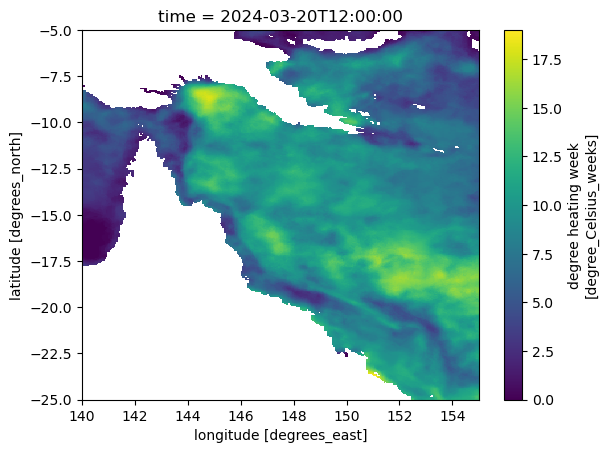

In [3]:
dhw = data.sel(time = "2024-03-20")

dhw = dhw.sel(lat = slice(-5, -25), lon = slice(140,155))
dhw.degree_heating_week.plot()

### Get a time series from one point

Extract the data from one point. As we won´t probablhy provide exact matching coordinates with the data we use `method='nearest'`which looks for the closest pixel
We then get the data from that particualr pixel acroos the time range ("pixel drill")

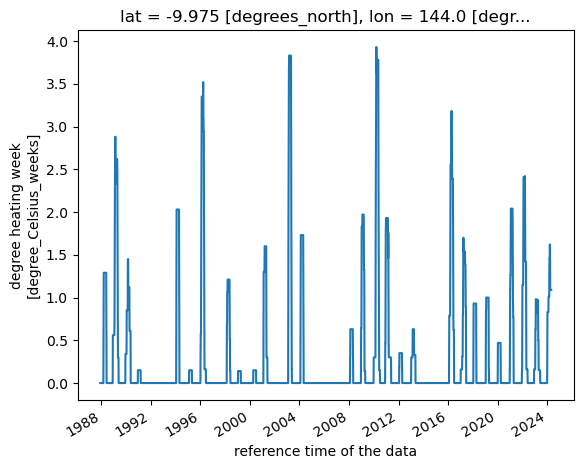

In [4]:
# Plotting DHW values for a particular location
reefDHW = data.degree_heating_week.sel(lat = -10.0, lon = 144.0, method = 'nearest')
reefDHW = reefDHW.sel(time = slice('1987-12-01', '2024-04-30'))
reefDHW.plot()